In [1]:
import os
import pandas

dir_path = './Data_RNN'

df = pandas.DataFrame()
    
for file_name in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_name)
    if not os.path.isdir(file_path):
        ext = os.path.splitext(file_path)[-1]
        if ext == '.txt': 
            print(file_path)
            
            curr_df = pandas.read_csv(file_path, delim_whitespace=True, header=None, usecols=[6])
            df = df.append(curr_df)

./Data_RNN/201301.txt
./Data_RNN/201302.txt
./Data_RNN/201306.txt
./Data_RNN/201307.txt
./Data_RNN/201401.txt
./Data_RNN/201402.txt
./Data_RNN/201403.txt
./Data_RNN/201405.txt
./Data_RNN/201406.txt
./Data_RNN/201503.txt
./Data_RNN/201601.txt


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

dataset = df.values
dataset = dataset.astype('float32')
#dataset = np.log10(dataset)

# normalize
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = np.reshape(dataset, (11, 288, 1))

#dataset.shape

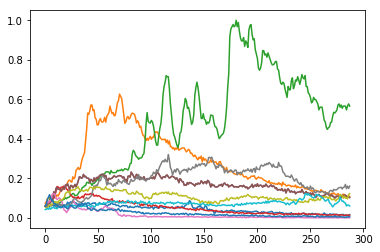

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

for ds in dataset:
    plt.plot(ds)
    
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


model = Sequential()
model.add(LSTM(128, batch_input_shape=(1, 20, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, batch_input_shape=(1, 20, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

#model = Sequential()
#model.add(LSTM(128, batch_input_shape=(1, 20, 1), stateful=True))
#model.add(Dropout(0.3))
#model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

Using Theano backend.


In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:( i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
for epoch in range(10):
    
    for event_idx in range(10):
    
        print('epoch : ' + str(epoch) + ' | event id : ' + str(event_idx))
        
        trainX, trainY = create_dataset(dataset[0], 20)
        trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1)) # samples, time steps, features
        trainY = np.reshape(trainY, (trainY.shape[0], 1))

        model.fit(trainX, trainY, nb_epoch=1, batch_size=1, verbose=2, shuffle=False)
        model.reset_states()

epoch : 0 | event id : 0
Epoch 1/1
4s - loss: 1.4101e-04
epoch : 0 | event id : 1
Epoch 1/1
4s - loss: 1.7075e-04
epoch : 0 | event id : 2
Epoch 1/1
4s - loss: 1.5752e-04
epoch : 0 | event id : 3
Epoch 1/1
4s - loss: 1.3516e-04
epoch : 0 | event id : 4
Epoch 1/1
4s - loss: 1.3884e-04
epoch : 0 | event id : 5
Epoch 1/1
4s - loss: 1.4025e-04
epoch : 0 | event id : 6
Epoch 1/1
4s - loss: 1.2880e-04
epoch : 0 | event id : 7
Epoch 1/1
4s - loss: 1.3387e-04
epoch : 0 | event id : 8
Epoch 1/1
4s - loss: 1.2898e-04
epoch : 0 | event id : 9
Epoch 1/1
4s - loss: 1.3397e-04
epoch : 1 | event id : 0
Epoch 1/1
4s - loss: 1.3382e-04
epoch : 1 | event id : 1
Epoch 1/1
4s - loss: 1.3262e-04
epoch : 1 | event id : 2
Epoch 1/1
4s - loss: 1.3414e-04
epoch : 1 | event id : 3
Epoch 1/1
4s - loss: 1.2674e-04
epoch : 1 | event id : 4
Epoch 1/1
4s - loss: 1.2541e-04
epoch : 1 | event id : 5
Epoch 1/1
4s - loss: 1.3177e-04
epoch : 1 | event id : 6
Epoch 1/1
4s - loss: 1.3681e-04
epoch : 1 | event id : 7
Epoch 

/Users/tykimos/Projects/Keras/venv/lib/python2.7/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [7]:
testX, testY = create_dataset(dataset[0], 20)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

testPredict = [testX[0]]

In [8]:
look_ahead = 288 - 20
predictions = np.zeros((look_ahead, 1))
    
for i in range(look_ahead):
    prediction = model.predict(np.array([testPredict[-1]]), batch_size=1, verbose=0)
    predictions[i] = prediction
    testPredict.append(np.vstack([testPredict[-1][1:], prediction]))
    
model.reset_states()

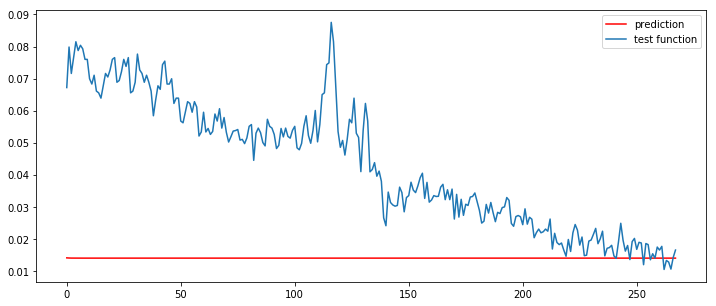

In [9]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions,'r', label="prediction")
plt.plot(np.arange(look_ahead), testY, label="test function")
plt.legend()
plt.show()

In [12]:
testX, testY = create_dataset(dataset[0], 20)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

testPredict = [testX[0]]

look_real = 100
look_ahead = 287-100

predictions = np.zeros((look_real + look_ahead, 1))

for i in range(look_real):
    
    prediction = model.predict(np.array([testPredict[-1]]), batch_size=1, verbose=0)
    predictions[i] = prediction
    testPredict.append(np.vstack([testPredict[-1][1:], testY[i]]))
    
for i in range(look_ahead):
    prediction = model.predict(np.array([testPredict[-1]]), batch_size=1, verbose=0)
    predictions[look_real + i] = prediction
    testPredict.append(np.vstack([testPredict[-1][1:], prediction]))
    
model.reset_states()  

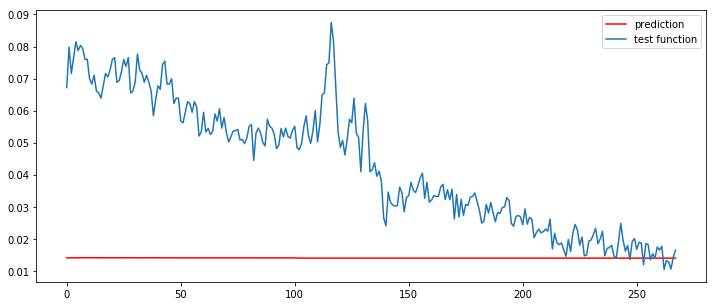

In [13]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(268), predictions[:268],'r', label="prediction")
plt.plot(np.arange(268), testY[:268], label="test function")
plt.legend()
plt.show()